In [1]:
import sinaps as sn
Ca=sn.ions.Ca

Loading BokehJS ...

In [19]:
n=7

N=sn.Neuron()

for i in range(n):
    N.add_section(sn.Section(L=10,#100 μm (Migliore et al 2005) up to 600 μm
                       a=0.7,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0),# mV
                 2*i,2*i+1) 
    N.add_section(sn.Section(L=1200,#100 μm (Migliore et al 2005) up to 600 μm
                       a=0.8-0.12*i,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=0.15,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0),# mV
                2*i+1,2*i+2)
    N[2*i].dx=10
    N[2*i+1].dx=200




In [20]:
import numpy as np

In [21]:
N[0].add_channel(sn.channels.custom(lambda V,t:100*np.sin(t/10)),0)
for i in range(n):
    N[2*i].add_channel(sn.channels.Hodgkin_Huxley())
    N[2*i+1].add_channel(sn.channels.LeakChannel(0.03))

In [22]:
sim=sn.Simulation(N,dx=0)

In [23]:
sim.run((0,200),max_step=1)





  0%|          | 0/200 [00:00<?, ?ms/s]



  0%|          | 0.001/200 [00:01<63:51:05, 1149.34s/ms]



  2%|▏         | 4.554/200 [00:01<43:40:44, 804.54s/ms] 



  3%|▎         | 5.8/200 [00:01<30:23:05, 563.26s/ms]  



  3%|▎         | 6.917/200 [00:01<21:08:55, 394.31s/ms]



  4%|▍         | 7.929/200 [00:01<14:43:41, 276.05s/ms]



  4%|▍         | 8.948/200 [00:02<10:15:28, 193.29s/ms]



  5%|▌         | 10.121/200 [00:02<7:08:17, 135.34s/ms]



  6%|▌         | 11.906/200 [00:02<4:57:02, 94.75s/ms] 



  7%|▋         | 13.055/200 [00:02<3:26:46, 66.37s/ms]



  7%|▋         | 14.065/200 [00:02<2:24:05, 46.50s/ms]



 10%|▉         | 19.975/200 [00:02<1:37:40, 32.55s/ms]



 11%|█         | 22.382/200 [00:02<1:07:30, 22.80s/ms]



 21%|██        | 41.589/200 [00:02<42:08, 15.96s/ms]  



 27%|██▋       | 54.589/200 [00:02<27:05, 11.18s/ms]



 33%|███▎      | 65.783/200 [00:03<17:30,  7.83s/ms]



 37%|███▋      | 74.958/200 [00:03<11:28,  5.50s/ms]



 41%|████      | 81.9

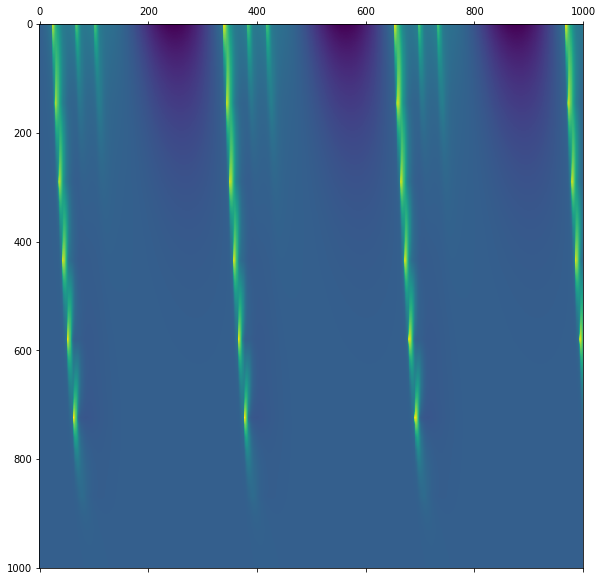

In [24]:
sim.view.graph2D()

In [25]:
sim.view.V(0)

In [14]:
self=sim

In [17]:
D = self._difus_mat(310,Ca,10)#[μm^3/ms]
D

<24x29 sparse matrix of type '<class 'numpy.float64'>'
	with 72 stored elements in LInked List format>

In [23]:
np.sin(1)

0.8414709848078965

In [23]:
(D @ self.k_c) * self.Vol1

array([ 0.        , -0.00502655,  0.0100531 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00502655, -0.00837758,  0.00837758,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [13]:
sim.N.volume_array()

array([ 5.,  5., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,  5.,
        5., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [14]:
self.difus_end(sn.ions.Ca)

array([0.25132741, 0.12566371, 0.25132741, 0.12566371, 0.25132741,
       0.12566371, 0.25132741, 0.12566371])

In [15]:
sim.run_diff(ion=sn.ions.Ca,max_step=0.1)

100%|██████████| 20.0/20 [00:03<00:00,  5.64ms/s]  


In [31]:
sim.C[Ca][1].loc[::,::].plot(ylabel='Concentration (mM/L)',figsize=(800,500))

Figure(id='1457', ...)

In [13]:
sim.V[0].loc[::,::].plot(ylabel='Concentration (mM/L)',figsize=(800,500))

Figure(id='1002', ...)

In [11]:
sim.N[0].C0

{}

In [16]:
sim.N.I(sim.sol.y[sim.idV],sim.sol.y[sim.idS],sim.sol.t)

ValueError: shape mismatch: value array of shape (2,552) could not be broadcast to indexing result of shape (2,)

In [18]:
t=sim.sol.t

In [46]:
V=sim.sol.y[0,sim.idV]

In [60]:
V.tolist()

[0.25,
 0.2500089567093333,
 0.25001791282382313,
 0.2501074216137343,
 0.2501968708322878,
 0.2505999105415581,
 0.2510017410004933,
 0.251402344951957,
 0.25288000644946257,
 0.25434084354415687,
 0.2557850031540862,
 0.2595978663707494,
 0.2632935795264152,
 0.266875144445261,
 0.2703454758071244,
 0.2797307040504007,
 0.2882826715049619,
 0.29606103541924833,
 0.30312102529275115,
 0.3182362171601357,
 0.329744760014752,
 0.33826979330438384,
 0.3443306206410427,
 0.3483604148151318,
 0.3514795530363452,
 0.3514243482335486,
 0.34907644502284096,
 0.3450975854799668,
 0.3399847728304306]

In [105]:
D= sn.Simulation._difus_mat(N,310,Ca,V,0)#[μm^3/ms]
ddCi = D[sim.idV,:].multiply(sim.Vol1) #[aM/μm^3/ms]


ValueError: row index 24 out of bounds

In [106]:
D[,:]

ValueError: row index 24 out of bounds

In [91]:
D.multiply?

In [96]:
(D@V(0)).shape

(24,)

In [100]:
V(0).shape

(29,)

In [76]:
sim.Vol1.shape

(24,)

In [77]:
D.shape

(24, 29)

In [70]:
sim.k_c

<5x24 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [63]:
sn.Simulation._difus_mat(N,310,Ca,[V])

TypeError: unhashable type: 'list'

In [66]:
V=interpolate.interp1d(sim.sol.t,sim.sol.y[sim.idV],
                                fill_value='extrapolate')

In [65]:
from scipy import interpolate

In [19]:
len(t)

552

In [21]:
import numpy as np

In [28]:
np.zeros([self.nb_comp,len(4.)])

TypeError: object of type 'float' has no len()

In [24]:
np.zeros?

In [45]:
((t <= 2.) & (t >= 1.))*4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
273+37

310

In [15]:
y=sim.sol.y[0]
t=1

In [16]:
import numpy as np
cc=np.concatenate

In [17]:
from scipy.sparse import dia_matrix
from scipy import interpolate

In [18]:
import matplotlib.pyplot as plt

In [19]:
Vt=np.array([0, 10, 1, 0, 0])

In [20]:
sim.sol.y[sim.idV].shape

(29, 399)

In [21]:
sim.sol.y[sim.idS].shape

(0, 399)

In [22]:
len(sim.sol.t)

399

In [23]:
ion=sn.ions.Ca
T=310 #K
t=0

In [24]:
V=interpolate.interp1d(sim.sol.t,sim.sol.y[sim.idV])
n = self.nb_comp
m = self.nb_con
k=11.6045*ion.charge/T

Vt=V(t)
Vtt=Vt[1:]-Vt[:-1]

In [25]:
#flux inside a section
d=np.resize(self.difus_array(ion),n+m-1)
j=dia_matrix((
    np.array([cc([[0],d*(1-k/2*Vtt)]),
              cc([d*(-1-k/2*Vtt),[0]
                 ])]),
    [0,-1]),shape=(n+1,n+m)).tolil()
#j[sim.N.idE]=0 # No current for  nodes
j[-1]=0 # No current for last compartiment
jtt=(j[1:]-j[:-1]).tolil() # Current difference

In [26]:
#flux for connecting nodes
d_end=self.difus_end(ion)
idA=cc([[s['idV'][0] for s in self.sections],
        [s['idV'][-1] for s in self.sections]])
idB=cc([[s['i']+n for s in self.sections],
        [s['j']+n for s in self.sections]])
Vttk=k/2*(Vt[idA] - Vt[idB])
jtt[idA,idB] =  d_end*(1+Vttk)
jtt[idA,idA] +=  d_end*(-1+Vttk)

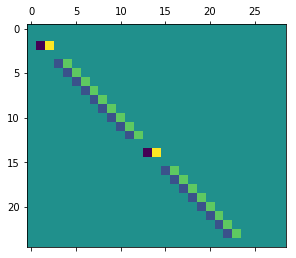

In [27]:
plt.matshow(j.todense())

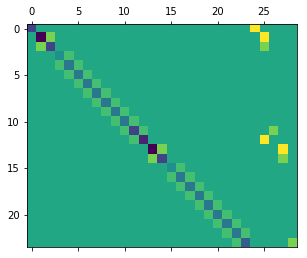

In [28]:
plt.matshow(jtt.todense())

In [29]:
Vtt

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
D=dia_matrix((
    np.array([k*(-2*Vt+cc(0,Vt[:-1])+cc(Vt[1:],0))-2,
              k*cc(0,Vtt) + 1,
              k*cc(Vtt,0) + 1]),
    [0,1,-1]),shape=(len(Vt),len(Vt)))

TypeError: dispatcher for __array_function__ did not return an iterable

In [ ]:
from line_profiler import LineProfiler
lp = LineProfiler()
lp_wrapper = lp(sim.run)
lp.add_function(sn.Simulation.ode_function)
lp.add_function(sim.N.I)
lp.add_function(sn.channels.Hodgkin_Huxley.I) 
lp_wrapper((0,20))
lp.print_stats()

In [ ]:
D.todense()

In [ ]:
sim.N.connection_mat()

In [ ]:
sim=sn.Simulation(N)

In [ ]:
sim.run((0,10))

In [ ]:
sim.view.graph2D()

In [ ]:
sim.sol.y[]

In [ ]:
from scipy import interpolate

In [ ]:
V=interpolate.interp1d(sim.sol.t,sim.sol.y)
Vt=V(10)[sim.idV]

In [ ]:
V(0,10)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
y=sim.sol.t
x=sim.N.indexV_flat()
V=interpolate.interp2d(x,y,sim.sol.y[:sim.N.nb_comp,:].reshape(-1))
X = np.arange(x[0], x[-1], (x[-1]-x[0])/100 )
Y = np.arange(y[0], y[-1], (y[-1]-y[0])/100 )
X2, Y2 = np.meshgrid(X, Y)
Z = V(X,Y)

# Plot the surface.
surf = ax.plot_surface(X2, Y2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [ ]:
len(sim.sol.y)

In [ ]:
len(sim.N.indexV_flat())

In [ ]:
sim.sol.y

In [ ]:
import numpy as np

In [ ]:
len(sim.idV)

In [ ]:
z=np.concatenate([y[:sim.N.nb_comp,:] for y in sim.sol.y])

In [ ]:
sim.sol.y[:sim.N.nb_comp,:].reshape(-1)

In [ ]:
sim.N.nb_comp

In [ ]:
len(z)

In [ ]:
89*225